In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

In [6]:
df = pd.read_csv('./data/train.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Матрица пропущенных значений')

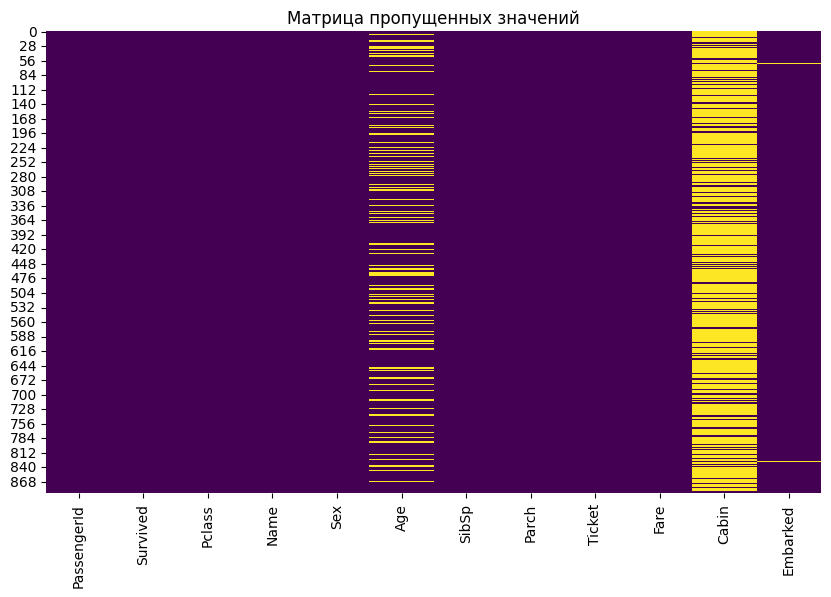

In [8]:
# выводим матрицу пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Матрица пропущенных значений')

In [9]:
# В пирзнаке возраст пропущено не так много значений, его можно заполнить средним
df.Age = df.Age.fillna(df.Age.mean())

In [10]:
# В признаке Cabin пропущено много и нет оригинальной идеи, как эти значения можно заполнить, этот признак проще удалить
df = df.drop(columns=["Cabin"])

In [11]:
# В признаке Embarked пропущено совсем мало значений, его можно заполнить самым частым и наиболее вероятным
df.fillna({"Embarked": df["Embarked"].mode()[0]}, inplace=True)

In [12]:

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
classes_list = ["Not survived", "Survived"]

Classes conts on train: [444. 268.]
Class diff counts: [  0. 176.]


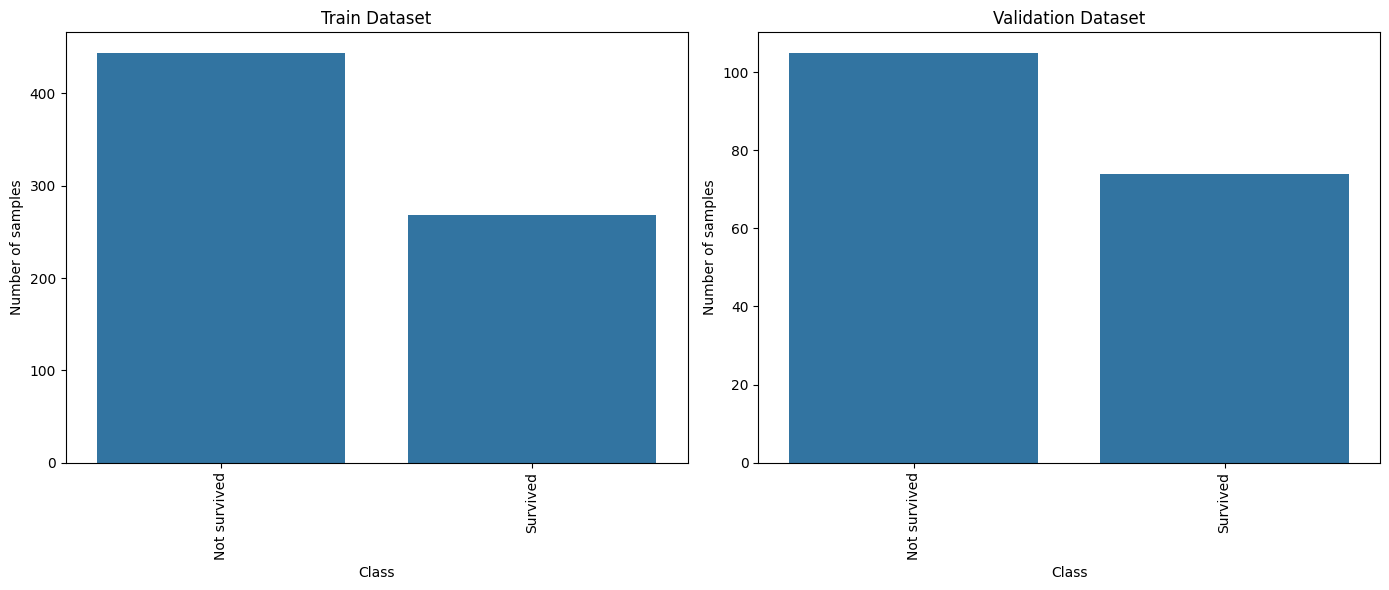

In [14]:
# Подсчитать количество изображений в каждом классе для обучающего набора данных
train_class_counts = np.zeros(2)
for idx, row in train_df.iterrows():
    label = row['Survived']
    train_class_counts[label] += 1
    
print(f"Classes conts on train: {train_class_counts}")
print(f"Class diff counts: {np.max(train_class_counts) - train_class_counts}")

# Подсчитать количество изображений в каждом классе для валидационного набора данных
val_class_counts = np.zeros(2)
for idx, row in val_df.iterrows():
    label = row['Survived']
    val_class_counts[label] += 1

# Создать barplot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Barplot для обучающего набора данных
sns.barplot(x=classes_list, y=train_class_counts, ax=ax[0])
ax[0].set_title('Train Dataset')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of samples')
ax[0].tick_params(axis='x', rotation=90)

# Barplot для валидационного набора данных
sns.barplot(x=classes_list, y=val_class_counts, ax=ax[1])
ax[1].set_title('Validation Dataset')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of samples')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [15]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [16]:
# Инициализация MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Применение бинаризации
Embarked_encoding = mlb.fit_transform(df['Embarked'])

# Создание DataFrame с закодированными признаками
Embarked_df = pd.DataFrame(Embarked_encoding, columns=mlb.classes_)

# Объединение закодированных признаков с исходным DataFrame
df = pd.concat([df.drop('Embarked', axis=1), Embarked_df], axis=1)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1,0,0


In [18]:
test_df = pd.read_csv('./data/test.csv')

Text(0.5, 1.0, 'Матрица пропущенных значений')

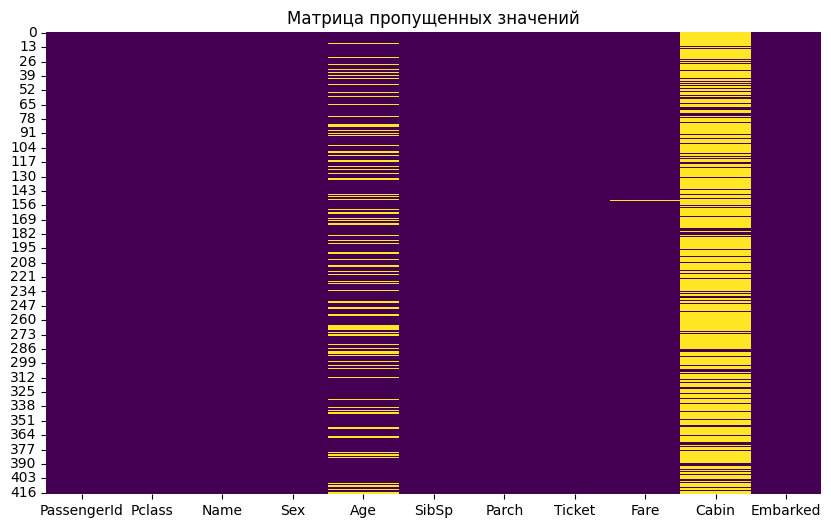

In [19]:
# выводим матрицу пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title('Матрица пропущенных значений')

In [26]:
True in test_df["Fare"].isnull().to_list()

True

In [27]:
import pickle

In [49]:
with open('./saved_models/decision_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [50]:
df = pd.read_csv('./data/train.csv')
df.Age = df.Age.fillna(df.Age.mean())
df = df.drop(columns=["Cabin"])
df.fillna({"Embarked": df["Embarked"].mode()[0]}, inplace=True)

# we even don't need it
df = df.drop(columns=["PassengerId"])

mlb = MultiLabelBinarizer()
Embarked_encoding = mlb.fit_transform(df['Embarked'])
Embarked_df = pd.DataFrame(Embarked_encoding, columns=mlb.classes_)
df = pd.concat([df.drop('Embarked', axis=1), Embarked_df], axis=1)

# only for test dataset
if True in df["Fare"].isnull().to_list():
    df.fillna({"Fare": df["Fare"].mean()}, inplace=True)

#! Temporary
df = df.drop(columns=["Name", "Ticket"])
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [51]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


In [52]:
y_true = df["Survived"].to_list()

In [53]:
df = df.drop(columns=['Survived'])

In [54]:
y_pred = loaded_model.predict(df)

In [55]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [56]:
np.sum(y_pred == y_true) / len(y_pred)

np.float64(0.8406285072951739)

In [57]:
df = pd.read_csv('./data/test.csv')
df.Age = df.Age.fillna(df.Age.mean())
df = df.drop(columns=["Cabin"])
df.fillna({"Embarked": df["Embarked"].mode()[0]}, inplace=True)

# we even don't need it
df = df.drop(columns=["PassengerId"])

mlb = MultiLabelBinarizer()
Embarked_encoding = mlb.fit_transform(df['Embarked'])
Embarked_df = pd.DataFrame(Embarked_encoding, columns=mlb.classes_)
df = pd.concat([df.drop('Embarked', axis=1), Embarked_df], axis=1)

# only for test dataset
if True in df["Fare"].isnull().to_list():
    df.fillna({"Fare": df["Fare"].mean()}, inplace=True)

#! Temporary
df = df.drop(columns=["Name", "Ticket"])
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [58]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.50000,0,0,7.8292,0,1,0
1,3,0,47.00000,1,0,7.0000,0,0,1
2,2,1,62.00000,0,0,9.6875,0,1,0
3,3,1,27.00000,0,0,8.6625,0,0,1
4,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1
414,1,0,39.00000,0,0,108.9000,1,0,0
415,3,1,38.50000,0,0,7.2500,0,0,1
416,3,1,30.27259,0,0,8.0500,0,0,1


In [59]:
y_pred = loaded_model.predict(df)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,